# Тема 1. Проверка знаний Python

**Работаем с выборкой размера N = 1000 из распределения $\mathcal{N}$(0, 2)**

In [1]:
import numpy as np
import scipy.stats as st
import math as mt
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
N = 1000
MEAN, STD = 0, mt.sqrt(2)
rng = np.random.default_rng(5555)
sample = rng.normal(MEAN, STD, N)

### 0 задание
Давайте проверим правило трёх сигм на практике!

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/1920px-Empirical_rule_histogram.svg.png
     width="400" align="left"/>

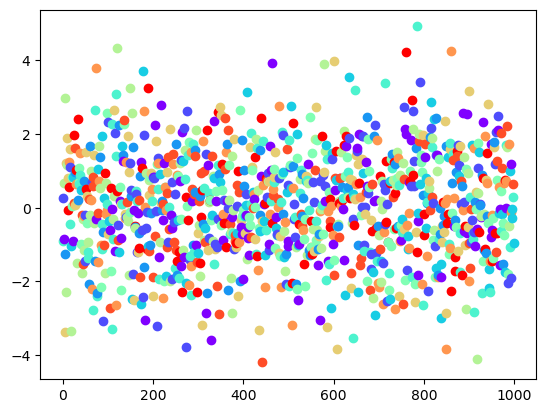

In [3]:
# plt.scatter(np.arange(1, N+1), sample)
colors = cm.rainbow(np.linspace(0, 1, 11))
for i, x in enumerate(sample):
    plt.scatter(i, x, color=rng.choice(colors))

### 1 задание

In [4]:
print(f'Медиана: {np.median(sample)}')
print(f'Выборочное среднее: {sample.mean()}')
print(f'Выборочная дисперсия: {sample.var()}')

Медиана: 0.033764230824092904
Выборочное среднее: 0.02478867003690635
Выборочная дисперсия: 2.0838654894674136


### 2 задание
Найти $\overline{sin(X)}$

In [5]:
np.sin(sample).mean()

0.014102770671170052

### 3 задание

In [6]:
sample_positive = sample[sample > 0]
print(f'Старый минимум: {sample.min()}')
print(f'Новый минимум: {sample_positive.min()}')

Старый минимум: -4.196468832754829
Новый минимум: 0.01325719943097719


### 4 задание
Пусть $S_k = X_1 + · · · + X_k$. Найти минимальное $k$ такое, что $S_k > s$, где число $s$ вводится пользователем. Если такого нет, вывести $n + 1$.

In [10]:
desired = float(input('Какую сумму Вы хотите превысить? '))
for ans, s in enumerate(itertools.accumulate(sample), 1):
    if s > desired:
        break
else:
    ans = N + 1
print(f'Вам придётся дойти до {ans}-ого элемента выборки из {N} возможных!')
print(f'За это время Вы накопите сумму: {s}')

Какую сумму Вы хотите превысить? 10000
Вам придётся дойти до 1001-ого элемента выборки из 1000 возможных!
За это время Вы накопите сумму: 24.788670036906353


### 5 задание
Построить гистограмму, построить оценку плотности и теоретическую плотность на одном графике (не забывайте подписывать графики).

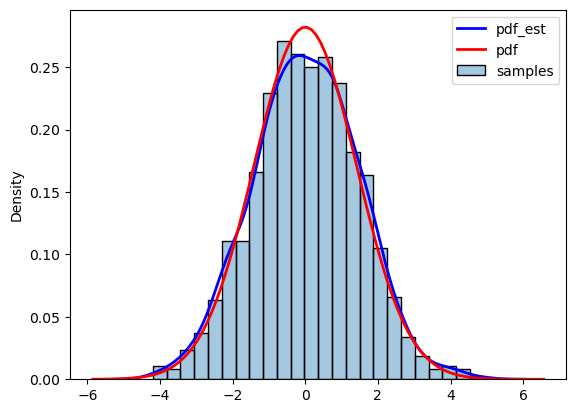

In [8]:
ax = sns.histplot(sample, stat='density', alpha=0.4, label='samples')
sns.kdeplot(sample, lw=2, color='b', label='pdf_est')

x_pdf = np.linspace(*ax.get_xlim(), 100)
ax.plot(x_pdf, st.norm.pdf(x_pdf, MEAN, STD), lw=2, color='r', label='pdf')

ax.legend()
plt.show()